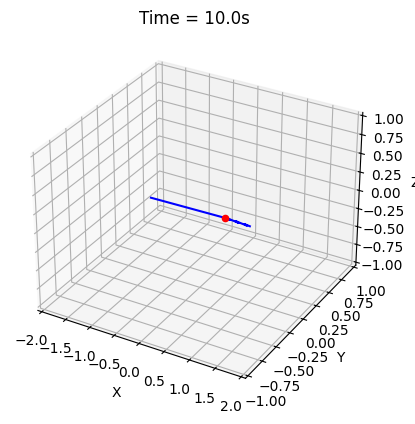

In [3]:
#3D анимация
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mass = 1.0
k1 = 10.0
k2 = 15.0
x1 = -1.0
x2 = 1.0
initial_position = 0.5
initial_velocity = 0.0


dt = 0.02
duration = 10.0
num_steps = int(duration / dt)


def acceleration(x, v):
    force1 = -k1 * (x - x1)
    force2 = -k2 * (x - x2)
    return (force1 + force2) / mass


positions = np.zeros((num_steps, 3))
velocities = np.zeros((num_steps, 3))


positions[0, 0] = initial_position
velocities[0, 0] = initial_velocity

for i in range(1, num_steps):
    a = acceleration(positions[i-1], velocities[i-1])
    velocities[i] = velocities[i-1] + a * dt
    positions[i] = positions[i-1] + velocities[i] * dt


def draw_spring_3d(ax, start, end, nodes, width):
    nodes = max(int(nodes), 1)
    spring_coords = np.zeros((3, nodes + 2))
    spring_coords[:, 0], spring_coords[:, -1] = start, end

    length = np.sqrt(np.sum((start - end) ** 2))
    u_t = (end - start) / length
    u_n = np.cross(u_t, [1, 0, 0])
    if np.allclose(u_n, [0, 0, 0]):
        u_n = np.cross(u_t, [0, 1, 0])
    u_n /= np.linalg.norm(u_n)
    normal_dist = np.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2
    for i in range(1, nodes + 1):
        spring_coords[:, i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    ax.plot(spring_coords[0, :], spring_coords[1, :], spring_coords[2, :], color='b')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()

    draw_spring_3d(ax, np.array([x1, 0, 0]), np.array([positions[frame, 0], positions[frame, 1], positions[frame, 2]]), 6, 0.2)
    draw_spring_3d(ax, np.array([x2, 0, 0]), np.array([positions[frame, 0], positions[frame, 1], positions[frame, 2]]), 6, 0.2)

    ax.scatter(positions[frame, 0], positions[frame, 1], positions[frame, 2], color='r')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Time = {frame * dt:.1f}s')

ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=50)
ani.save('ball_oscillation_3d_along_x.gif', writer='pillow', fps=30)
plt.show()


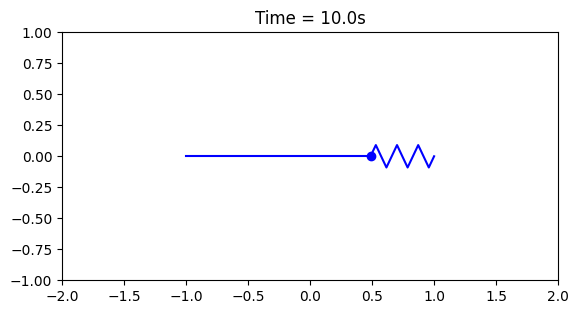

In [4]:
#2D анимация
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


mass = 1.0
k1 = 10.0
k2 = 15.0
x1 = -1.0
x2 = 1.0
initial_position = 0.5
initial_velocity = 0.0


dt = 0.02
duration = 10.0
num_steps = int(duration / dt)


def acceleration(x, v):
    force1 = -k1 * (x - x1)
    force2 = -k2 * (x - x2)
    return (force1 + force2) / mass


positions = np.zeros(num_steps)
velocities = np.zeros(num_steps)


positions[0] = initial_position
velocities[0] = initial_velocity


for i in range(1, num_steps):
    a = acceleration(positions[i-1], velocities[i-1])
    velocities[i] = velocities[i-1] + a * dt
    positions[i] = positions[i-1] + velocities[i] * dt


def draw_spring(ax, start, end, nodes, width):
    nodes = max(int(nodes), 1)
    spring_coords = np.zeros((2, nodes + 2))
    spring_coords[:,0], spring_coords[:,-1] = start, end

    length = np.sqrt(np.sum((start - end) ** 2))
    u_t = (end - start) / length
    u_n = np.array([u_t[1], -u_t[0]])
    normal_dist = np.sqrt(max(0, width**2 - (length**2 / nodes**2))) / 2
    for i in range(1, nodes + 1):
        spring_coords[:,i] = (
            start
            + ((length * (2 * i - 1) * u_t) / (2 * nodes))
            + (normal_dist * (-1)**i * u_n))

    ax.plot(spring_coords[0,:], spring_coords[1,:], color='b')


fig, ax = plt.subplots()

def update(frame):
    ax.clear()

    draw_spring(ax, np.array([x1, 0]), np.array([positions[frame], 0]), 6, 0.2)
    draw_spring(ax, np.array([x2, 0]), np.array([positions[frame], 0]), 6, 0.2)

    ax.plot(positions[frame], 0, 'bo')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_title(f'Time = {frame * dt:.1f}s')

ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=50)
ani.save('ball_oscillation.gif', writer='pillow', fps=30)
plt.show()
